<a href="https://colab.research.google.com/github/pschorey/Valpo_IT533/blob/main/IT_533_STEM_Module6_AdvancedClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 6: ADVANCED CLASSIFICATION**
In this module, we are going to study different ways of setting up advanced classification models. At the end of this notebook, you will be able to:
* Explain what classification trees do and how, taken together as Random Forest, they produce more reliable results than single trees
* Build a Random Forest algorithm
* Explain how a Simple Neural Network works 

**Be sure to expand all the hidden cells, run all the code, and do all the exercises--you will need the techniques for the lesson lab!**


#**What is the Classification Process?**
When you work with algorithms, you basically follow a pretty standard process. This process consists of the following steps:
0. **Preparation and Setup**: Loading the data and verifying that the data has indeed loaded
1. **Exploratory Data Analysis**: Getting a basic understanding of the data, including number of columns and rows, data types, data shape and distribution (remember 5-number summary?), and the like
2. **Preprocessing**: Cleaning the data up and reducing them to the smallest useful dataset with which you and your hardware will be able to work. This includes building a reduced dataframe.
3. **Splitting your data into Training and Test set**: We use the Training set to configure the model and the Test set to evaluate how well the model works. NOTE that you will need to remove the class attribute from the test set because this is the attribute whose values you want to predict.
4. **Building and Training the model**: Here, you select the algorithm you are going to use and you configure it using the Training set.
5. **Evaluating the Quality of the model**: This is where you apply the configured model to the Test set and determine how accurately it handles the test data. In other words, we compare the calculated class values to the actual class values shown in the test set. At the end, you'll use THREE methods to evaluate:
* The accuracy score (shows how the calculated predictions for the test data class compare to the actual class values that you have split off)
* The Confusion Matrix (visualization which compares the number of predictions with the number of true class values)
* The Classification Report (numeric breakdown and overview of accuracy and more)

And that's it! Let's dive into the material now!


#**1. Tree-Based Classification**
A Classification tree assigns data records to discrete levels (or labels) in a class attribute. It is built through binary recursive partitioning, which means that data is being split into partitions, then sub-partitions, and sub-sub-partitions, and so on. The outcome is a tree with a root, several branches, and leaves like the one below (which comes from [this awesome post](https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054) on classification trees that will tell you almost everything you need to know):

<div>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/classtree.jpeg" width="400">
</div>


Now take a look at the first video in which I explain this in more detail (and with examples):

<iframe width="560" height="315" src="https://www.youtube.com/embed/BxQAIyDxDKg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [ ]:
from IPython.display import HTML # This is just for me so I can embed videos
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BxQAIyDxDKg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

While decision tree models are awesome, they have some real disadvantages:
1. If you build your training and test sets with random sampling, no two decision trees about the same dataset will be the same. So, can you ever really tell what the *real* result of your math is? Not really
2. They don't really work well with really big datasets because they classify *everything* in a dataset, to the point of going into too much detail. [This is called overfitting](https://aws.amazon.com/what-is/overfitting/) and can waste considerable resources.  

Wouldn't it be much better to combine different trees from randomly sampled subsets of the same dataset and then check where these trees come to the same solution? 

##**Welcome to Random Forest!**

Random Forest doesn't build just one tree--it builds an entire classroom full of trees, each one of which is based on a slightly different training set (which is, in fact, a small randomized subset of the big overall training set). To save processing power, Random Forest then picks just a random few of the attributes to consider when building each tree, so that no two trees are based on the same attributes. Finally, Random Forest evaluates all the trees it has constructed and, for a given prediction, outputs the class assignment that is the mode of the classes (classification) or, if you run it as a regression tree, the mean prediction (regression) of the individual trees.

<div>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/randomforest2.png" width="600">
</div>

So, we have:
* A number of trees
* Using a random subset of features in the dataset to make their split decisions
* Built on a number of slightly different training subsets, selected as random samples with replacement (= bootstrap aggregating or bagging) from the overall training set
* A voting function that selects the mode of the classes (classification or the mean prediction (regression)

In other words, we introduce dual randomness into our classification in order to pick the best model from the places where all the individual trees overlap. That leaves us with much greater accuracy for our model.

We are working with the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from the scikit-learn package.



##**1.0. Preparation and Setup**
There really isn't anything new going on between the modules on k Nearest Neighbor and Naive Bayes and this one. As with our previous problems, we will use the insurance dataset again.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import spatial
import statsmodels.api as sm

from IPython.display import HTML # This is just for me so I can embed videos
from IPython.display import Image # This is just for me so I can embed images

#Reading in the data as insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/insurance_with_categories.csv")

#Verifying that we can see the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Now we are ready for our Exploratory Data Analysis (EDA).

##**1.1 Exploratory Data Analysis (EDA)**
This is always the first step. Even though we already know this dataset, let's walk through the motions again. In the previous module, we used the ydata profiling package to generate a beautiful HTML interface with tabs that showed us everything we needed to know and then some more--but it required installing a new package. You may not always have the user permissions to do this. So, below is the basic process of data investigation.

###**1.1.1 Data Shape and Distribution**
Run each code line below to see what it does.

In [2]:
insurance.describe(include = 'all'), print("***DATA OVERVIEW***")

***DATA OVERVIEW***


(                age   sex          bmi     children smoker     region  \
 count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
 unique          NaN     2          NaN          NaN      2          4   
 top             NaN  male          NaN          NaN     no  southeast   
 freq            NaN   676          NaN          NaN   1064        364   
 mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
 std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
 min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
 25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
 50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
 75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
 max       64.000000   NaN    53.130000     5.000000    NaN        NaN   
 
              charges  
 count    1338.000000  
 unique           NaN  
 top              NaN  
 freq         

In [3]:
insurance.dtypes, print("***DATA TYPES***")

***DATA TYPES***


(age           int64
 sex          object
 bmi         float64
 children      int64
 smoker       object
 region       object
 charges     float64
 dtype: object,
 None)

In [4]:
insurance.corr(numeric_only=1), print("***DATA CORRELATIONS***")

***DATA CORRELATIONS***


(               age       bmi  children   charges
 age       1.000000  0.109272  0.042469  0.299008
 bmi       0.109272  1.000000  0.012759  0.198341
 children  0.042469  0.012759  1.000000  0.067998
 charges   0.299008  0.198341  0.067998  1.000000,
 None)

## Your Turn
What do these commands show you? Why is this important? Explain in the text field below:

1. .describe() shows the count, unique, mode, frequency, quartiles, and max for each column in the data set.
*   describe() gives a quick overview of the data and is useful for seeing data ranges, unique counts, and other great data from a big picture.
2. .dtypes() shows the data type of each column
*   this is helpful for recognizing which columns are numeric or objects (strings) etc.
3. .corr() shows a correlation chart with the correlation between columns.
*   corr() is helpful when seeing which columns are closely or distantly related by scoring between 0 -no correlation and 1 - perfectly correlated



###**1.1.2 Some Basic Visualiations**

<Axes: >

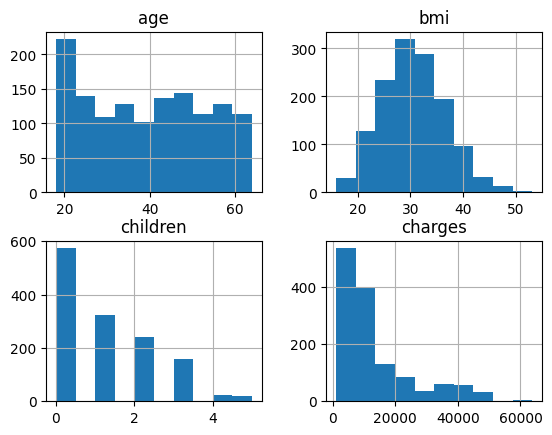

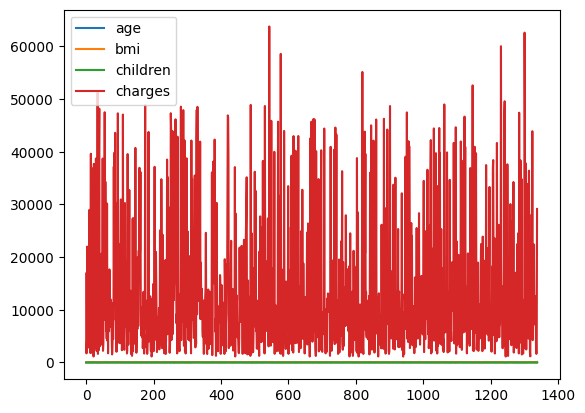

In [5]:
# Data Distribution (numeric data only)
insurance.hist()
insurance.plot()

I know ... I promised you a pie plot in Module 1, and that was too hard back then. Here are two ways to do this. 

**NOTE** that all plots require numeric information, so you have to first count the size of each level in a categorical attribute and then build the pie size based on that. You already know groupby, so all you need to do is get the size of each group with the size() command--or you can make an array from the attribute and count the values. Both ways are shown below.

**Uncomment each of the code lines below separately to see how they work**:

<Axes: >

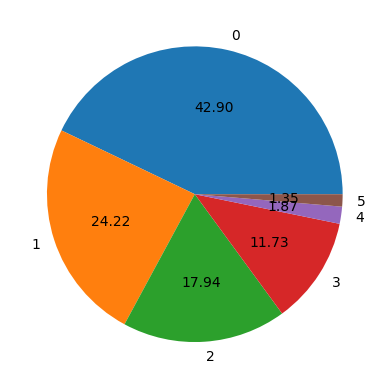

In [11]:
# You can also use the groupby command we have learned earlier in this course.
#insurance.groupby('sex').size().plot(kind='pie', autopct='%.2f')
#insurance['sex'].value_counts().plot(kind='pie', autopct='%.2f')
insurance.groupby('children').size().plot(kind='pie', autopct='%.2f')

##Your Turn
Now analyze the second code line above and then display just the counts for the levels in the 'region' attribute:

<Axes: >

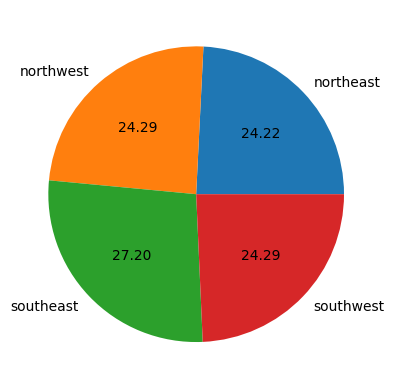

In [12]:
insurance.groupby('region').size().plot(kind='pie', autopct='%.2f')

##**1.2. Preprocessing: Building the Dataframe for Analysis**
We will, as before, use the "region" attribute as the class attribute and the numeric attributes (age, bmi, children, charges) in the insurance dataframe as the predictors. Since we already know that no data is missing, all we have to do is assemble the insurance2 dataframe we are going to use. 

In the code row below, build the insurance2 dataframe we need (if you don't remember how to do this, review last week's module in which we built this dataframe already):

In [13]:
insurance2 = pd.DataFrame(insurance, columns = ['age', 'bmi', 'children','charges','region'])

##**1.3. Setting up the Training and the Test Sets**
Just like before, we need to build the training set and the test set again. We want a **80% training/ 20% test split**. Finish the code below to build this (if you can't remember how to do this, use the code from any of the two previous workbooks):

In [14]:
from sklearn.model_selection import train_test_split
x=insurance2.iloc[:,:4] # all parameters
y=insurance2['region'] # class labels 'southwest', 'southeast', 'northwest', 'northeast'
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.20) 
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))

X_train shape: (1070, 4)
X_test shape: (268, 4)


##**1.4. Build and Train the Random Forest classifier**
We are going to use the [RandomForestClassifier from sklearn.ensemble](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). The RandomForestClassifier has a number of really interesting parameters that we can control in order to optimize our model to run quickly and efficiently, especially the sub-sample size, which is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.



###**1.4.1 Building the Classifier**

The most important parameters are:
* n_estimators int, default=100 --
The number of trees in the forest.
* criterion{“gini”, “entropy”}, default=”gini” -- 
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
* max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto” -- 
The number of features to consider when looking for the best split: If int, then consider max_features features at each split. If “auto”, then max_features=sqrt(n_features). If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.
* max_depthint, default=None -- 
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
* min_samples_split int or float, default=2
The minimum number of samples required to split an internal node
* bootstrap bool, default=True -- Whether bootstrap samples are used when building trees (which is 50% of the whole idea behind Random Forest). If False, the whole dataset is used to build each tree.

Let's get started!

In [15]:
# Importing the Random Forest library.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# Configuring the classifier and using get_params to double-check all the parameters with which it is configured
rf = RandomForestClassifier()
rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

###**1.4.2 Training the Classifier**
rf is our Random Forest classifier. As before, we use .fit to train the classifier on the dataset. 
X_train[['age', 'bmi', 'children', 'charges']] are all the feature columns of the training set, and y_train is 'region'. Based on these we want to make a prediction.

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## **1.5. Use the Classifier to test and predict**
There is nothing different about the steps below than what you have already done. Uncomment the second line starting with "print" if you would like to see the output of your predictions.

In [18]:
y_pred = rf.predict(X_test)
#print(y_pred) # If you want to see the big long list, uncomment this line!

##**1.6. Evaluate the Quality of the Model**
OK, now we can calculate the accuracy score and then look at the Confusion Matrix.

###**1.6.1 Accuracy Score**

First, the accuracy score:

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.39925373134328357

Would you accept a result of 38% on an exam? (Take a look at the grading scale for this course to see where that would land you). Let's see what the Confusion Matrix tells us about this lousy score.

###**1.6.2 Confusion Matrix**
And now the Confusion Matrix:

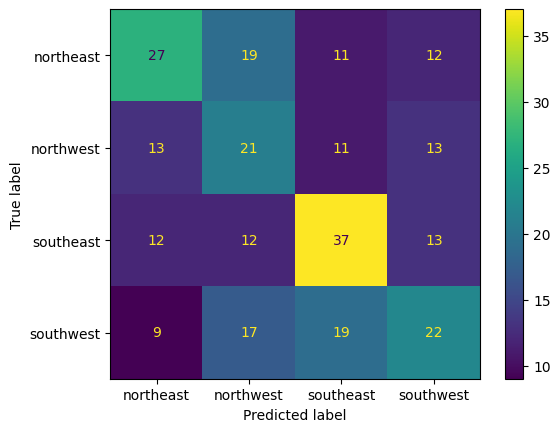

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
cm_display = ConfusionMatrixDisplay(cm, display_labels=rf.classes_).plot()

Let's look at the "northwest" row: Out of 21+24+8+13 = 66 true northwest values, only 24 were predicted correctly. 21 were predicted as northeast, 8 as southeast, and 13 as southwest. 

##Your Turn
What about the "southwest" row? Are the results better or worse? Write your explanation into the text field below:

Southwest correct 22, wrong 9, 17, 19. So results were a bit worse.

###**1.6.3 Classification Report**
The Classification Report gives us even more insights into how well (or, in our case, badly) our model performs. To read it correctly, we first have to define a few terms:

* **precision** (also called positive predictive value) is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly ((true positives) / (true positives + false positives)). Said another way, “for all instances classified positive, what percent was correct?”
* **recall** (also known as sensitivity) is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive ((true positives) / (true positives + false negatives)). Said another way, “for all instances that were actually positive, what percent was classified correctly?
* **f-1 score** is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
* **support** is the number of actual occurrences of the class in the specified dataset.

Now you have all the tools to read the classification report below:

In [21]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred, labels=['northeast', 'northwest', 'southeast','southwest']))

              precision    recall  f1-score   support

   northeast       0.44      0.39      0.42        69
   northwest       0.30      0.36      0.33        58
   southeast       0.47      0.50      0.49        74
   southwest       0.37      0.33      0.35        67

    accuracy                           0.40       268
   macro avg       0.40      0.40      0.39       268
weighted avg       0.40      0.40      0.40       268



Can you explain what these numbers mean for the insurance2 dataset? 

northwest had the lowest precision: (of all the times the model guessed northwest, it was correct 30% of the time) (Looking at the math in the column)

southeast had the highest percision 47%, of all the times southeast was guessed, it was correct 47% of the time.

southwest has the lowest recall 33%, of all the times southwest should have been chosen it was picked 33% of the time. (Looking at the math in the row)

southeast has the highest recall 50%, of all the times it should have been picked, it was picked correct 50% of the time.

f1 - mean between recall / precision. gives a good estimate into how well the model is predicting. The overall model accurace was 40%.  Southeast had the best predictions at 49% and northwest scored the lowest at 33%


# **2. Artificial Neural Networks**
Artificial Neural Networks are modeled on the human brain. They are true learning networks in that they self-optimize with a learning function that is designed to reduce the error of each processing cycle. This is why Neural Networks work well with large datasets and unstructured data.

At the end of this module, you will be able to:
* Describe how a simple Neural Network works
* Identify the summation and the activation functions
* Take appropriate preprocessing steps for Neural Networks
* Build a simple Neural Network

Let's get started!


## **What is a Neural Network?**
Neural networks are modeled after the human brain. As the name indicates, Neural Networks consist of neurons, where the data processing happens, and dendrites and axons that make up the pathways between neurons. 

<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/1200px-Neural_network_example.svg.png" width="200">
</div>

The data enter the Neural Network through the **INPUT LAYER** (green) and the classification results are found in the **OUTPUT LAYER** (purple). As the data makes its way through the network, its value is determined by weights. These weights are adjusted by an algorithm called a perceptron, whose goal is to minimize error values. That happens int he **HIDDEN LAYER** (teal).

Each neuron in the hidden layer contains essentially two functions:
1. The summary function, which aggregates input data and passes its output on to the 
2. Activation function, which applies a previously defined algorithm to the data it has received from the summary function. 

Here is a close-up (from [an awesome article on Towards Data Science](https://towardsdatascience.com/inroduction-to-neural-networks-in-python-7e0b422e6c24) that you should read!) of what happens inside one of the teal dots above. The **SUMMATION FUNCTION** is blue and the **ACTIVATION FUNCTION** is purple. Note that the output is red:

<div>
<center>
<img src="https://raw.githubusercontent.com/shstreuber/Data-Mining/master/images/neuralnetwork.png" width="600">
</div>

And now take a look at the instructor video explaining this in detail and demonstrating how this works mathematically:




In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/NyAcHViPlCg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

##**2.0. Preparation and Setup**

As before, we are following the basic classification steps:

1. **Exploratory Data Analysis (EDA)** to see how the data is distributed and to determine what the class attribute in the dataset should be. This will be the attribute you'll predict later on
2. **Preprocess the data** (remove n/a, transform data types as needed, deal with missing data) --> here is where we will need to take a few additional steps to **configure our data for the Neural Network**
3. **Split the data** into a training set and a test set
4. **Build the model** based on the training set
5. **Test the model** on the test set
6. **Determine the quality of the model** with the help of a Confusion Matrix and a Classification Report.

As with our previous problems, we will use the insurance dataset again.

In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

#Reading in the data as insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/shstreuber/Data-Mining/master/data/insurance_with_categories.csv")

#Verifying that we can see the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **2.1. Exploratory Data Analysis (EDA)**
As before, we have the option to either do this in a code cell just like above, or to import the HTML-based ydata_profile package. Why don't you try this below?

In [23]:
!pip install -U ydata-profiling[notebook,unicode]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1be3c8f91f2b2cebc7028cd0bc045c5a76dd5014ca62f8da36cadec00c58273e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempti

In [24]:
from ydata_profiling import ProfileReport
#steamNumeric = steam[['Price_USD','Positive_Reviews', 'Negative_Reviews', 'Peak_Concurrent_Players', 'Required_Age', 'Avg_Rating_5', 'Playability_Index_10', 'Owners_Max', 'Platforms_Num']]

profile = ProfileReport(insurance, title="Insurance Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

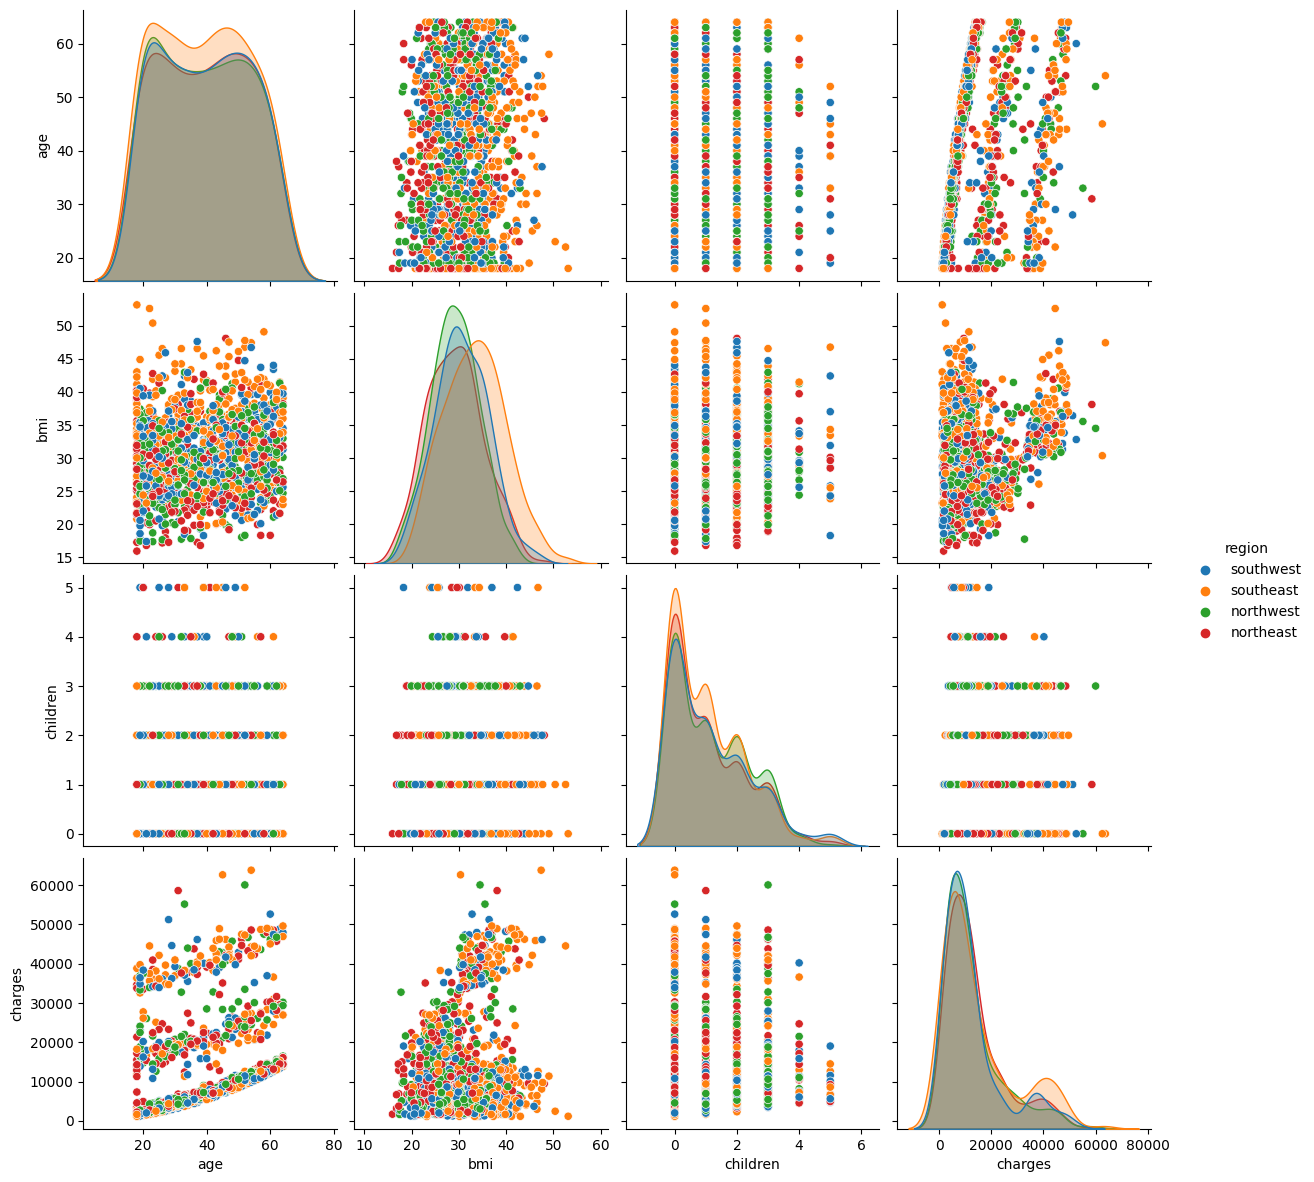

In [25]:
# Visualizing the data with a pairplot because why not?
# Let's investigate what kinds of relationships exist between the variables.

sns.pairplot(insurance,hue="region", height=3, diag_kind="kde")

We can see that the dataset is somewhat structured with linear relationships among age and charges. However, we don't see a clear distribution for region--and we remember that the results from our Random Forest analysis weren't too convincing at about 38% accuracy. Let's see if a Neural Network gives us a better understanding of how the numeric predictors in the dataset can help us determine the region attribute.

## **2.2 Preprocessing**
Let's get started!

###**2.2.1 Reducing the Data**
You have done this before. Build an insurance_nn dataset consisting of age, bmi, children, charges, and--again--region as the class attribute. 



In [26]:
insurance_nn = pd.DataFrame(insurance, columns = ['age', 'bmi', 'children','charges','region'])
insurance_nn.head()

,age,bmi,children,charges,region
0,19,27.900,0,16884.92400,southwest
1,18,33.770,1,1725.55230,southeast
2,28,33.000,3,4449.46200,southeast
3,33,22.705,0,21984.47061,northwest
4,32,28.880,0,3866.85520,northwest


###**2.2.2 Preparing the Data for use with a Neural Network**
In this section, you will see that preparing data to work with a Neural Network requires a bit more preprocessing than what you may be used to from previous algorithms.

#### 2.2.2.1 Encoding
Our Neural Network code will require numeric labels in the output layer. It will not work with categorical variables. This is why we will need [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform the non-numerical labels in 'region' (as long as they are hashable and comparable) to numerical labels.

In [28]:
# Replace southwest with 0, southeast with 1, northwest with 2, and northeast with 3 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
insurance_nn["region"] = labelencoder.fit_transform(insurance_nn["region"])
region = pd.DataFrame({'region': ['southwest', 'southeast', 'northwest', 'northeast']})
insurance_nn.head()

,age,bmi,children,charges,region
0,19,27.900,0,16884.92400,3
1,18,33.770,1,1725.55230,2
2,28,33.000,3,4449.46200,2
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,1


**NICE!**

**UH, WAIT!:** LabelEncoder introduced a new problem: The numbers in 'region' look like ordinal relationships--but southeast(1) is not higher than southwest(0) and southeast(1) is not smaller than northwest(2). 

That's why, in our case, LabelEncoder will not work out, and we need instead a four-dimensional vector. With a four-dimensional vector, our Neural Network can then assign presence (=1) or absence (=0) to each of our four labels. Thus, southwest would be [1,0,0,0], southeast would be [0,1,0,0], northwest would be [0,0,1,0], and northeast [0,0,0,1]. If you google around, you'll find that that's what [Onehotencorder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) does. 

**BUT** 

OneHotEncoder doesn't work with strings--and that's what we have in our 'region' attribute: Categorical data in words, i.e. strings. So, there is a third (and, I promise, final!) option to preprocess out data: We will use [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). Getdummies converts string columns into one-hot representation (also known here as a sparse matrix because it has a few 1s and many 0s). That's what we want!



In [29]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
insurance_nn = create_dummies(insurance_nn,"region")

insurance_nn.head()

,age,bmi,children,charges,region,region_0,region_1,region_2,region_3
0,19,27.900,0,16884.92400,3,0,0,0,1
1,18,33.770,1,1725.55230,2,0,0,1,0
2,28,33.000,3,4449.46200,2,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


And here we are! As you can see above, the region attribute--our class--is no longer just one column (although we left 'region' in the dataframe to prove the point); it is now 4 columns, indexed from 0 to 3. These are the four labels in the output layer. Now the Neural Network just needs to check which of the "region bits" is switched on, and the data tuple can be dropped under that respective label. 

But we are not yet done with preprocessing.

#### 2.2.2.2 Standardizing the Data ##
Well, not only do Neural Networks not like string-type labels in the output layer; they also don't like non-standardized input attributes (aka features). That's because the Summation and Activation functions treat the values from each input attribute the same. Hence, these values need to fall into the same scale.

That is why need need to scale our feature values to a range between -1 and 1. 

For this, we will scale our data with [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). This helps us to speed up our algorithm (gradient descent) and have a more accurate classifier.

In [30]:
# Features before mean normalization
unscaled_features = insurance_nn[['age','bmi','children','charges']]

# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Calculate μ & σ(fit) and apply the transformation(transform)
unscaled_features_array = sc.fit_transform(unscaled_features.values)

# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
scaled_features = pd.DataFrame(unscaled_features_array, index=unscaled_features.index, columns=unscaled_features.columns)

scaled_features.head()

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802


Alright! Now that we are done with preprocessing, we can move on to the next step.

##**2.3. Splitting the data into Training and Test Set**


In [31]:
from sklearn.model_selection import train_test_split
X = scaled_features
y = insurance_nn['region']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

##**2.4. Determine Neural Network Architecture, then Build and Train the Model**

When we build the Neural Network architecture, we have to configure the following settings:
* the nummber of nodes in each layer
* the number of layers
* the way in which nodes are connected (feedforward, no loops between the units). 

The number of nodes in the input and output layers is determined by the dimensionality of the problem: We have 4 input units (age, bmi, children, charges) and 4 output units ('southwest', 'southeast', 'northwest', 'northeast'). 

However, determining the number of hidden nodes is not as easy. Typically, 10 nodes in the hidden layer tends to work better when the first hidden layer is larger than the input layer.

We will use the [Multilayer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) for this. The most salient parameters are:

* hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

* activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
Activation function for the hidden layer.

  * ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x

  * ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

  * ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

  * ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

* solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
The solver for weight optimization. We will talk about this more when we talk about Gradient Descent

  * ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

  * ‘sgd’ refers to stochastic gradient descent.

  * ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

* batch_size int, default=’auto’
Size of minibatches for stochastic optimizers. If the solver is ‘lbfgs’, the classifier will not use minibatch. When set to “auto”, batch_size=min(200, n_samples)

* max_iter int, default=200
Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

* verbose bool, default=False
Whether to print progress messages to stdout.

* validation_fraction float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True

This sounds like a lot. As you will see below, however, building the model is pretty anticlimactic.


In [32]:
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# running this with all the default settings, including a hidden_layer_sizes setting of 100 adn 200 maximum iterations. 
# Verbose is on so we can see how this runs.

mlp1 = MLPClassifier(verbose=1) # We are running this in verbose mode so we can see the output of each iteration.

Now that we have built the model (with all default settings, so we will look at 200 iterations), we will train the model on our training set. 

Since this will run in verbose mode, you will be able to see the self-optimization as it happens. Watch for the loss function (i.e. the error rate) becoming smaller with each iteration.

In [33]:
# As this runs in verbose mode, note how the loss function steps down with every single iteration!

mlp1.fit(X_train, y_train)

Iteration 1, loss = 1.38735605
Iteration 2, loss = 1.37060409
Iteration 3, loss = 1.36087091
Iteration 4, loss = 1.35437587
Iteration 5, loss = 1.35037955
Iteration 6, loss = 1.34733878
Iteration 7, loss = 1.34489464
Iteration 8, loss = 1.34266297
Iteration 9, loss = 1.34083392
Iteration 10, loss = 1.33915505
Iteration 11, loss = 1.33804148
Iteration 12, loss = 1.33682234
Iteration 13, loss = 1.33588784
Iteration 14, loss = 1.33490988
Iteration 15, loss = 1.33386824
Iteration 16, loss = 1.33287728
Iteration 17, loss = 1.33210788
Iteration 18, loss = 1.33157000
Iteration 19, loss = 1.33070941
Iteration 20, loss = 1.32991019
Iteration 21, loss = 1.32914162
Iteration 22, loss = 1.32846504
Iteration 23, loss = 1.32772228
Iteration 24, loss = 1.32734348
Iteration 25, loss = 1.32670705
Iteration 26, loss = 1.32633548
Iteration 27, loss = 1.32569144
Iteration 28, loss = 1.32493738
Iteration 29, loss = 1.32450532
Iteration 30, loss = 1.32413741
Iteration 31, loss = 1.32347420
Iteration 32, los

MLPClassifier(verbose=1)

The output here shows how the function is configured: 
* Relu: The units in the hidden layer apply the activation function to induce a sense of non-linearity in the network. Relu tells us how close these z are to 1 (1= we discover a pattern, namely a feature combination that leads to this output). In this way, we are discovering patterns from examining input-output examples. Without an activation function, NN would just be a linear regression function.
* 1 Epoch = 1 pass over the entire dataset
* Batch size = the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you’ll need.

##**2.5 Test the Model**
The moment of truth! What is the accuracy score here?


In [34]:
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print (mlp1.score(X_test,y_test))

0.31716417910447764


##**2.6 Evaluate the Quality**
You know the drill! First, we set up the Confusion Matrix, then the Classification Report. Go ahead and try it yourself!

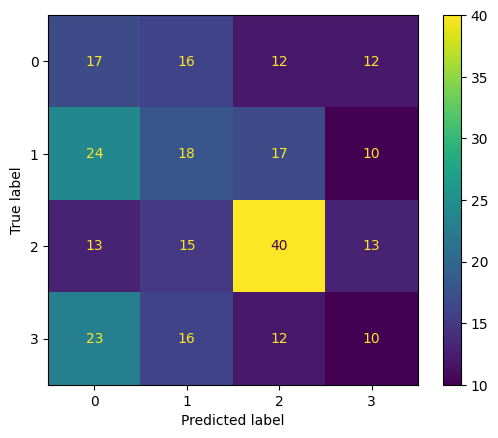

In [37]:
# Set up Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = mlp1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [38]:
# Set up Classification Report
from sklearn import metrics
from sklearn.metrics import classification_report
y_pred = mlp1.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.30      0.25        57
           1       0.28      0.26      0.27        69
           2       0.49      0.49      0.49        81
           3       0.22      0.16      0.19        61

    accuracy                           0.32       268
   macro avg       0.30      0.30      0.30       268
weighted avg       0.32      0.32      0.32       268



##Your Turn
What do you think of our model, given the Confusion Matrix? Is it better or worse than our Random Forest? How does it compare with our k Nearest Neighbor or our Naive Bayes output from the previous module?  Record your answer below.

Overall, I would have to say that our model is abo0ut 8% worse!

In [ ]:
# Now, let's see what the predictions look like
y_pred = mlp1.predict(X_test)
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [0 3 1 0 3 2 0 2 3 1 0 3 1 2 2 2 2 2 1 0 0 3 0 2 1 0 0 1 1 0 0 1 2 0 1 2 1
 3 1 2 0 2 3 0 2 1 1 0 1 2 0 2 2 0 3 1 3 2 0 3 1 2 1 0 0 1 0 1 1 2 2 3 3 3
 2 3 3 0 1 0 2 1 1 2 2 2 3 1 1 3 2 1 1 1 2 3 1 2 0 0 1 0 2 2 0 2 3 0 0 0 2
 2 1 3 1 2 1 1 1 1 1 3 2 2 0 3 2 1 0 2 3 3 2 2 2 2 2 0 2 3 3 3 2 2 0 1 1 0
 3 1 2 0 2 3 2 2 1 1 3 3 1 1 1 0 1 3 2 2 3 0 0 1 2 1 0 0 0 2 0 0 1 0 0 2 0
 2 1 0 2 0 2 0 0 3 2 3 0 1 0 3 3 0 2 0 0 0 3 0 2 0 0 1 2 0 0 0 1 1 0 2 2 2
 2 2 2 3 0 0 1 3 2 0 1 3 0 2 1 2 2 2 0 2 2 1 0 2 1 1 2 3 0 3 0 0 2 1 1 2 0
 3 1 0 0 2 0 1 2 3]


In [39]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.30      0.25        57
           1       0.28      0.26      0.27        69
           2       0.49      0.49      0.49        81
           3       0.22      0.16      0.19        61

    accuracy                           0.32       268
   macro avg       0.30      0.30      0.30       268
weighted avg       0.32      0.32      0.32       268



Um. Well. Maybe that wasn't such a great idea. Let's see if we can improve on this.

# Solutions

1.1 Data Shape
The analysis shows the connections and the dependencies between the different attributes. This is important because we want the X attributes (or features) to be independent from each other; the only dependent attribute should be the class attribute. If the X attributes are too correlated, we are looking at [multicollinearity](https://www.statisticshowto.com/multicollinearity/), which can impact the usefulness of our model.

In [40]:
# 1.2 Basic Visualizations
insurance.groupby('region').count()

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


In [41]:
# This is the solution for task 2 above. 
insurance2 = pd.DataFrame(insurance, columns = ['age', 'bmi', 'children','charges','region'])
insurance2.head()

,age,bmi,children,charges,region
0,19,27.900,0,16884.92400,southwest
1,18,33.770,1,1725.55230,southeast
2,28,33.000,3,4449.46200,southeast
3,33,22.705,0,21984.47061,northwest
4,32,28.880,0,3866.85520,northwest


In [42]:
# This is the solution for task 3 above:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

1.6.2 The prediction is just as bad.